In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline # displayed inline next to cells 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv("/content/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
'''
PassengerId: unique id number to each passenger
Survived: passenger survive(1) or died(0)
Pclass: passenger class
Name: name
Sex: gender of passenger
Age: age of passenger
SibSp: number of siblings/spouses
Parch: number of parents/children
Ticket: ticket number
Fare: amount of money spent on ticket
Cabin: cabin category
Embarked: port where passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)

Categorical Variable: Survived, Sex, Pclass, Embarked, Cabin, Name, Ticket, Sibsp, Parch
Numerical Variable: Fare, age and passengerId
'''
print('columns ',df.columns) #show the dataframe columns

#find all unique values and couts from categorical attributes
print(df[['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']].apply(lambda col: col.unique()))
print(df[['Survived', 'Sex', 'Pclass', 'Embarked', 'SibSp', 'Parch']].apply(lambda col: col.nunique()))

columns  Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Survived                   [0, 1]
Sex                [male, female]
Pclass                  [3, 1, 2]
Embarked           [S, C, Q, nan]
SibSp       [1, 0, 3, 4, 2, 5, 8]
Parch       [0, 1, 2, 5, 3, 4, 6]
dtype: object
Survived    2
Sex         2
Pclass      3
Embarked    3
SibSp       7
Parch       7
dtype: int64


In [ ]:
df.isnull().sum() #total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.loc[df.duplicated()] # duplicate rows 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


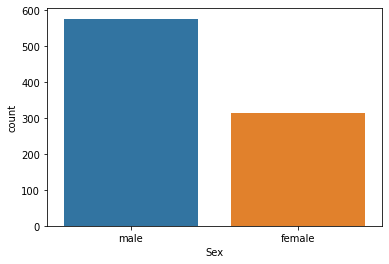

In [ ]:
sns.countplot(x='Sex', data=df) #total male vs female

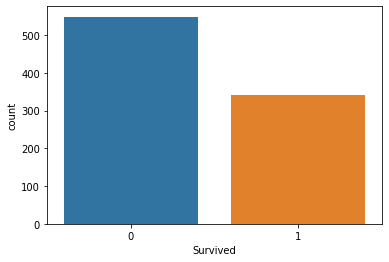

In [ ]:
sns.countplot(x='Survived', data=df) #how many people died vs survived 

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64


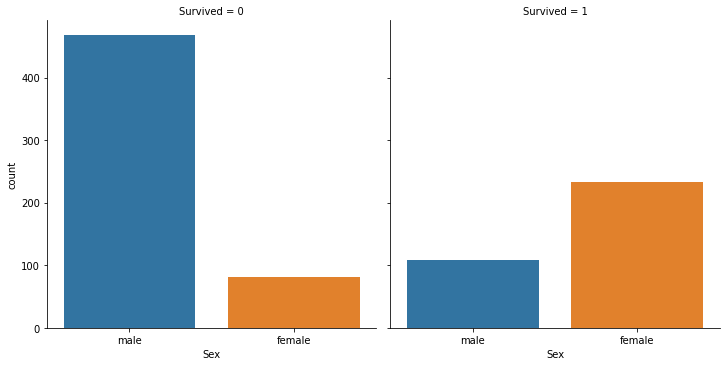

In [ ]:
# (male vs female) survived vs not survived
print (df.groupby(['Survived','Sex'])['Survived'].count())
sns.catplot(x='Sex', col='Survived', kind='count', data=df); 

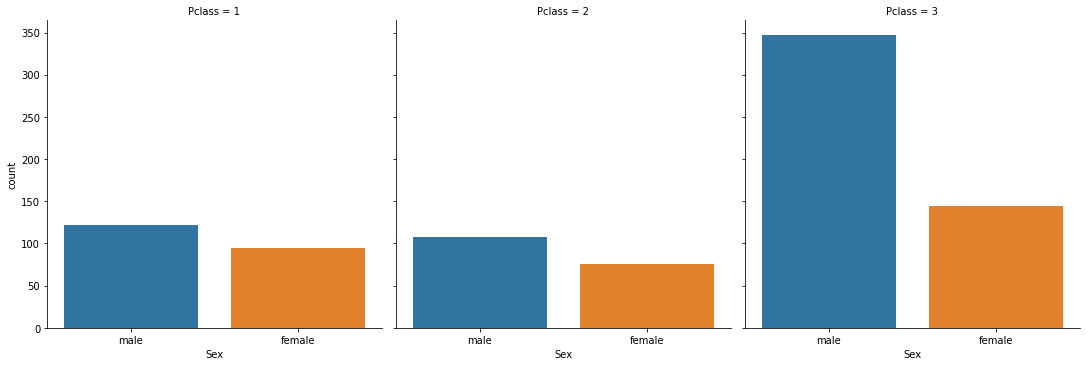

In [ ]:
sns.catplot(x='Sex', col='Pclass', kind='count', data=df) #male vs female in each passenger class

In [ ]:
df.groupby(['Survived','Sex','Pclass'])['Survived'].count() #people survival per class

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


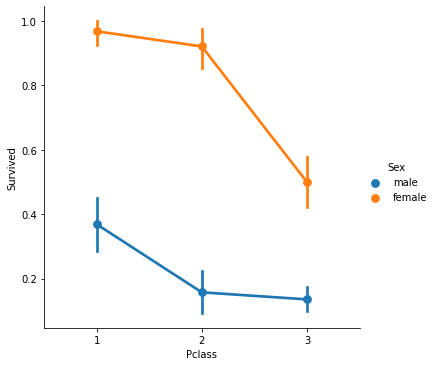

In [ ]:
sns.catplot('Pclass','Survived',hue='Sex', kind='point', data=df) #pclass vs survived males and females

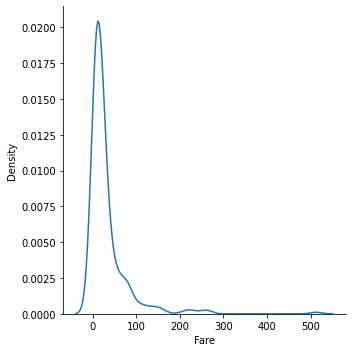

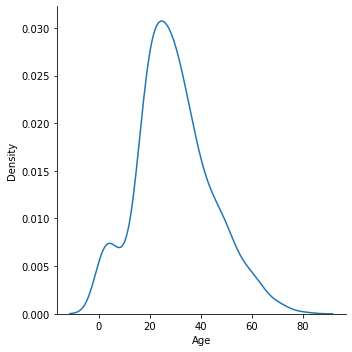

In [ ]:
'''
Fare is positive skewed distribution

positive(left side) - mode < median < mean
normal(centered) - mode = median = mean
negative(right side) - mean < median < mode 
'''
sns.displot(df, x="Fare", kind="kde") #Fare distribution
sns.displot(df, x="Age", kind="kde") #age distribution

In [ ]:
'''
for female in df[df.Sex == 'female'].Survived:
  if female == 1: # if female is survived then its 1 
    count ++ # count of all females survived

survived = 1, we can get sum to get total survived counts of females 
'''
survived_females = df[df.Sex == 'female'].Survived.sum()
total_females = df[df.Sex == 'female'].Survived.count()

print("% of women survived: " , survived_females / total_females)

% of women survived:  0.7420382165605095


In [ ]:
survived_males = df[df.Sex == 'male'].Survived.sum()
total_males = df[df.Sex == 'male'].Survived.count()

print("% of men survived: " , survived_males / total_males)

% of men survived:  0.18890814558058924


In [ ]:
#extract titles from names
for name in df["Name"]:
    #regex word ends with .
    df["Title"] = df["Name"].str.extract("([A-Za-z]+)\.",expand=True)

In [ ]:
print(df['Title'].unique()) 

['Mr' 'Mrs' 'Miss' 'Master' 'Don' 'Rev' 'Dr' 'Mme' 'Ms' 'Major' 'Lady'
 'Sir' 'Mlle' 'Col' 'Capt' 'Countess' 'Jonkheer']


In [ ]:
title_dict = {  'Mr':     'Mr',
                'Mrs':    'Mrs',
                'Miss':   'Miss',
                'Master': 'Master',
                'Ms':     'Miss',
                'Mme':    'Mrs',
                'Mlle':   'Miss',
                'Capt':   'military',
                'Col':    'military',
                'Major':  'military',
                'Dr':     'Dr',
                'Rev':    'Rev',
                'Sir':    'honor',
                'Countess': 'honor',
                'Lady':   'honor',
                'Jonkheer': 'honor',
                'Don':    'honor',
                'Dona':   'honor'
                }

# map titles to category
df['Title'] = df['Title'].map(title_dict)

In [ ]:
print(df['Title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'honor' 'Rev' 'Dr' 'military']


In [ ]:
#divide age into age groups
def label_en(age):
  '''
  assign group to given age 
  input: age of one passenger (float)   
  return: group label for given age (int) 
  
  '''
  if 0.1 <= age <= 10 :
    return 0

  elif  10 < age <= 20 :
    return 1

  elif 20 < age <= 30 :
    return 2

  elif 30 < age <= 40:
    return 3

  elif 40 < age <= 50 :
    return 4

  elif 50 < age <= 60 :
    return 5

  elif 60 < age <= 70 :
    return 6

  elif 70 < age :
    return 7

  else: 
    return float("NAN")

def age_grp_encode(age_grp):
  '''
  divide age into age groups
  input : age column (pandas series object)
  returns : age divided into gropus (pandas series object)
  '''
  return age_grp.apply(label_en) # .apply applies operation to every element of series

In [ ]:
age_data = df['Age'] #temp series
temp_age_grp = age_grp_encode(age_data)

In [ ]:
print(temp_age_grp)

0      2.0
1      3.0
2      2.0
3      3.0
4      3.0
      ... 
886    2.0
887    1.0
888    NaN
889    2.0
890    3.0
Name: Age, Length: 891, dtype: float64


In [ ]:
df['Age'] = temp_age_grp.values #replace old age values with age groups

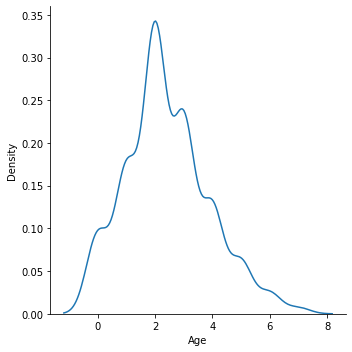

In [ ]:
sns.displot(df, x="Age", kind="kde") #age distribution

In [ ]:
#most frequent age value for each title
title_age_grp = df.groupby(['Title'])['Age'] 
for title in df['Title'].unique():
  # get individual group/individual title from groupby 
  # most frq value for each group/title
  print(title,title_age_grp.get_group(title).mode())

Mr 0    2.0
dtype: float64
Mrs 0    3.0
dtype: float64
Miss 0    2.0
dtype: float64
Master 0    0.0
dtype: float64
honor 0    3.0
dtype: float64
Rev 0    5.0
dtype: float64
Dr 0    4.0
dtype: float64
military 0    5.0
dtype: float64


In [ ]:
#create dict to replace nan value with most frequent age of selected title
title_age_dict = {
    'Mr' : 2.0,
    'Mrs' : 3.0,
    'Miss' : 2.0,
    'Master' : 0.0,
    'honor' : 3.0,
    'Rev' : 5.0,
    'Dr':4.0,
    'military':5.0
}

In [ ]:
#  x != x to check nan value 
for title in df['Title'].unique():
  for index, row in df.iterrows():
    x = row['Age'] 
    if x != x:
      current_title = df.iloc[index, -1] #current index and -1 is last column(Title)
      replace_age = title_age_dict[current_title] #get age from dictionary as per current title
      df.iloc[index, 5] = replace_age #replace nan with new age

In [ ]:
# after replacing NaN values
# convert float to int (because nan is float type)
df[['Age']] = df[['Age']].astype(int)

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True) #filling nan values

In [ ]:
df.isnull().sum() #total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
dtype: int64

In [ ]:
# dummy variables 
df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})

title_dict_label = {
    'Mr' : 1,
    'Mrs' : 2,
    'Miss' : 3,
    'Master' : 4,
    'honor' : 5,
    'Rev' : 6,
    'Dr':7,
    'military':8
    }
df['Title'] = df['Title'].map(title_dict_label) # replace title with labels from dict

df['Embarked'] = df['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}) 

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,2,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,2,0,0,STON/O2. 3101282,7.9250,NaN,0,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,3,0,0,373450,8.0500,NaN,0,1


Drop colums

In [ ]:
df.drop(['PassengerId', 'Name',
         'Ticket', 'Fare',
         'Cabin', 'Sex'],axis=1,inplace=True) # inplace = True , the data is modified in place

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Embarked,Title
0,0,3,2,1,0,0,1
1,1,1,3,1,0,1,2
2,1,3,2,0,0,0,3
3,1,1,3,1,0,0,2
4,0,3,3,0,0,0,1


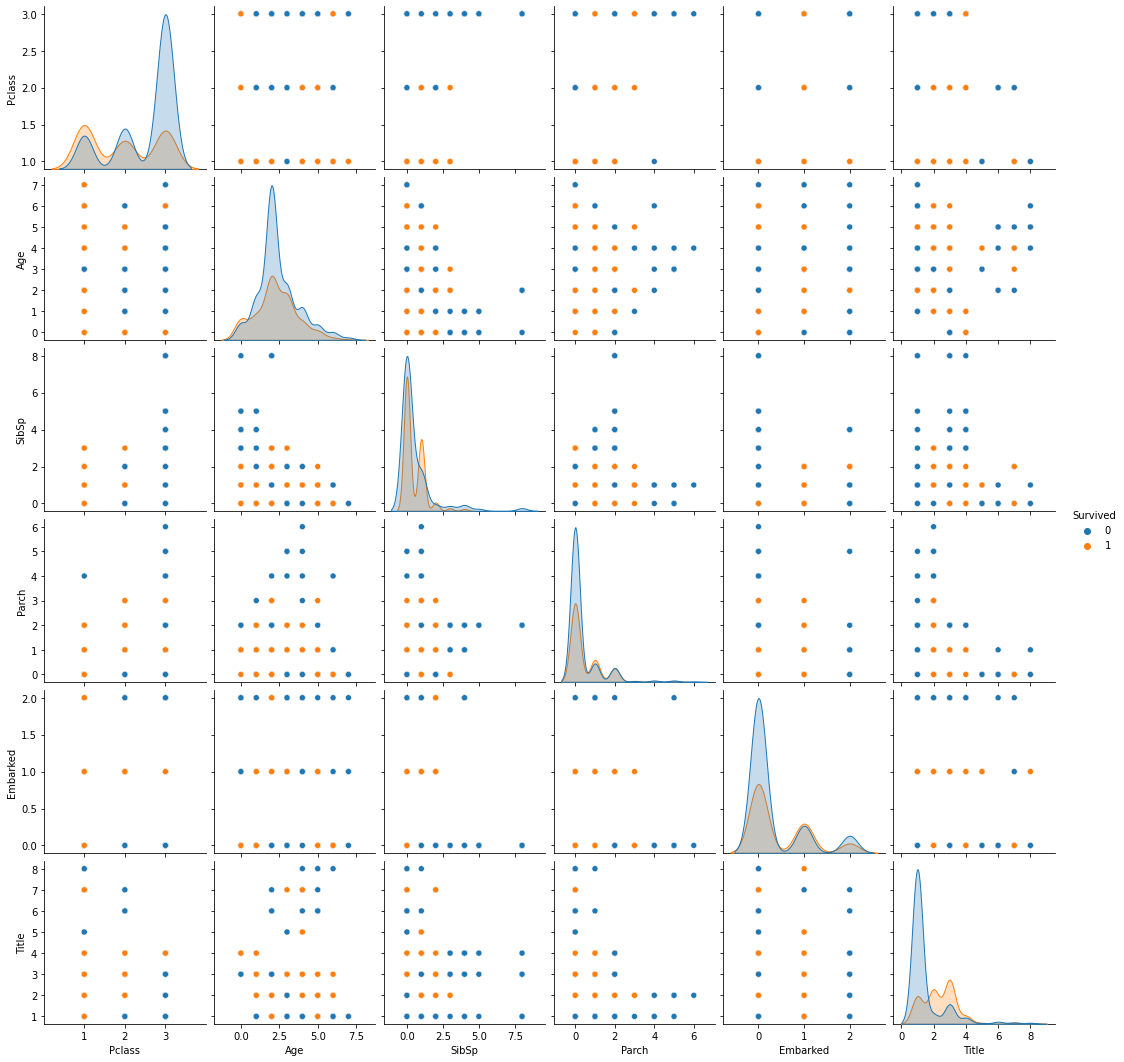

In [ ]:
sns.pairplot(df,hue='Survived')

In [ ]:
'''
pearson's correlation
(current element - mean of dataset) / std of dataset
'''
df.corr('pearson')

,Survived,Pclass,Age,SibSp,Parch,Embarked,Title
Survived,1.000000,-0.338481,-0.040883,-0.035322,0.081629,0.106811,0.354300
Pclass,-0.338481,1.000000,-0.349860,0.083081,0.018443,0.045702,-0.145281
Age,-0.040883,-0.349860,1.000000,-0.238654,-0.161368,-0.027240,-0.145660
SibSp,-0.035322,0.083081,-0.238654,1.000000,0.414838,-0.059961,0.231753
Parch,0.081629,0.018443,-0.161368,0.414838,1.000000,-0.078665,0.224890
Embarked,0.106811,0.045702,-0.027240,-0.059961,-0.078665,1.000000,0.106119
Title,0.354300,-0.145281,-0.145660,0.231753,0.224890,0.106119,1.000000


In [ ]:
title_dummies = pd.get_dummies(df['Title'],prefix='title')
df = df.drop('Title',axis = 1)
# Join the encoded df
df = df.join(title_dummies)

In [ ]:
age_dummies = pd.get_dummies(df['Age'],prefix='age')
df = df.drop('Age',axis = 1)
# Join the encoded df
df = df.join(age_dummies)

In [ ]:
df.head()

,Survived,Pclass,SibSp,Parch,Embarked,title_1,title_2,title_3,title_4,title_5,title_6,title_7,title_8,age_0,age_1,age_2,age_3,age_4,age_5,age_6,age_7
0,0,3,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,3,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
target = df['Survived'] # target variable
df = df.drop('Survived',axis=1)

In [ ]:
#reducing number of dimensions
'''
PCA 
1)take mean of data
2)covariance matrix
3)eigen value eigen vector for cov matrix
4)total variance = addition of two eigen values
5)calculate % variance for each eigen vector 
6)sort vectors in decreasing order
7)eigenvectors with highest eigen value is principal component    
8)make projection matrix with these vectors 
9)multiply standardized dataset with projection matrix to get final prin comp
''' 
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(df)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df,target, test_size = 0.3, random_state = 10, stratify = target) 

In [ ]:
'''
Gini 
(measures chosen element incorrectly identified)
1)gini for target variable 
2)gini for each attribute to get spliiting 
3)impurity = target gini - attri

Entropy
maximize the information gain from attributes
1)entropy for for target 
2)entropy each attribute
3)infromation gain = (1) - (2)
'''
from sklearn import tree
dtree = tree.DecisionTreeClassifier(criterion='entropy')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred_dtree = dtree.predict(x_test)
accuracy_score(y_test,y_pred_dtree)

0.8097014925373134

In [ ]:
#works on bootstrapped dataset 
#multiple decision trees 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=50,verbose=2,n_estimators=90)
rf.fit(x_train, y_train) #model training 

building tree 1 of 90
building tree 2 of 90
building tree 3 of 90
building tree 4 of 90
building tree 5 of 90
building tree 6 of 90
building tree 7 of 90
building tree 8 of 90
building tree 9 of 90
building tree 10 of 90
building tree 11 of 90
building tree 12 of 90
building tree 13 of 90
building tree 14 of 90
building tree 15 of 90
building tree 16 of 90
building tree 17 of 90
building tree 18 of 90
building tree 19 of 90
building tree 20 of 90
building tree 21 of 90
building tree 22 of 90
building tree 23 of 90
building tree 24 of 90
building tree 25 of 90
building tree 26 of 90
building tree 27 of 90
building tree 28 of 90
building tree 29 of 90
building tree 30 of 90
building tree 31 of 90
building tree 32 of 90
building tree 33 of 90
building tree 34 of 90
building tree 35 of 90
building tree 36 of 90
building tree 37 of 90
building tree 38 of 90
building tree 39 of 90
building tree 40 of 90
building tree 41 of 90
building tree 42 of 90
building tree 43 of 90
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.2s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=50, verbose=2,
                       warm_start=False)

In [ ]:
y_pred_rf = rf.predict(x_test) #predictions
accuracy_score(y_test,y_pred_rf)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:    0.0s finished


0.8283582089552238